Dataset loaded successfully from D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/raw/player_statistics.csv
Dataset loaded successfully from D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/raw/match_events.csv
Dataset loaded successfully from D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/raw/positional_data.csv
Dataset loaded successfully from D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/raw/biomechanical_data.csv
Feature Recent Injury not found in any dataset.
### Filtered Player Statistics Overview


,Age,Height,Mass,Gender,Dominance,Experience,SessionsPerWk,Treadmill,Grass,Trail,Volume,Pace,RaceDist,InjuryLoc,DiagnosticMed,ShoeSize,RFSI25,LFSI25,RHIPEXT
0,22,181.0,62.0,M,R,4,3,0,0,0,26-35 km,3.783333,5 Km,Right knee,Yes,10.5,Forefoot,Forefoot,16.575
1,22,181.0,62.0,M,R,4,3,0,0,0,26-35 km,3.783333,5 Km,Right knee,Yes,10.5,Forefoot,Forefoot,16.575
2,22,181.0,62.0,M,R,4,3,0,0,0,26-35 km,3.783333,5 Km,Right knee,Yes,10.5,Forefoot,Forefoot,16.575
3,22,181.0,62.0,M,R,4,3,0,0,0,26-35 km,3.783333,5 Km,Right knee,Yes,10.5,Forefoot,Forefoot,16.575
4,22,181.0,62.0,M,R,4,3,0,0,0,26-35 km,3.783333,5 Km,Right knee,Yes,10.5,Forefoot,Forefoot,16.575


### Filtered Player Statistics Description


,Age,Height,Mass,Experience,SessionsPerWk,Treadmill,Grass,Trail,Pace,ShoeSize,RHIPEXT
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,34.750000,175.960714,69.637500,101.500000,3.714286,1.000000,0.035714,0.107143,4.063929,9.482143,22.110417
std,6.576076,6.689962,7.613354,82.863311,0.700898,1.036642,0.185854,0.409378,0.370853,1.023446,4.662832
min,22.000000,162.700000,56.850000,4.000000,3.000000,0.000000,0.000000,0.000000,3.366667,7.500000,14.333333
25%,30.750000,169.000000,64.312500,36.000000,3.000000,0.000000,0.000000,0.000000,3.762500,8.500000,19.256250
50%,34.500000,177.400000,69.950000,84.000000,4.000000,1.000000,0.000000,0.000000,4.060000,9.500000,21.500000
75%,38.250000,181.825000,76.037500,135.000000,4.000000,2.000000,0.000000,0.000000,4.354167,10.500000,23.885417
max,51.000000,187.200000,82.150000,300.000000,5.000000,3.000000,1.000000,2.000000,4.833333,12.000000,33.950000


### Missing Values in Filtered Player Statistics


Series([], dtype: int64)

### Missing Values After Handling (Filtered Player Statistics)
### Missing Values in Filtered Player Statistics (Post-Handling)


C:\Users\Neethiarasu\AppData\Local\Temp\ipykernel_10684\4004217451.py:81: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  player_stats_filtered.fillna(method='ffill', inplace=True)  # Forward fill


Series([], dtype: int64)

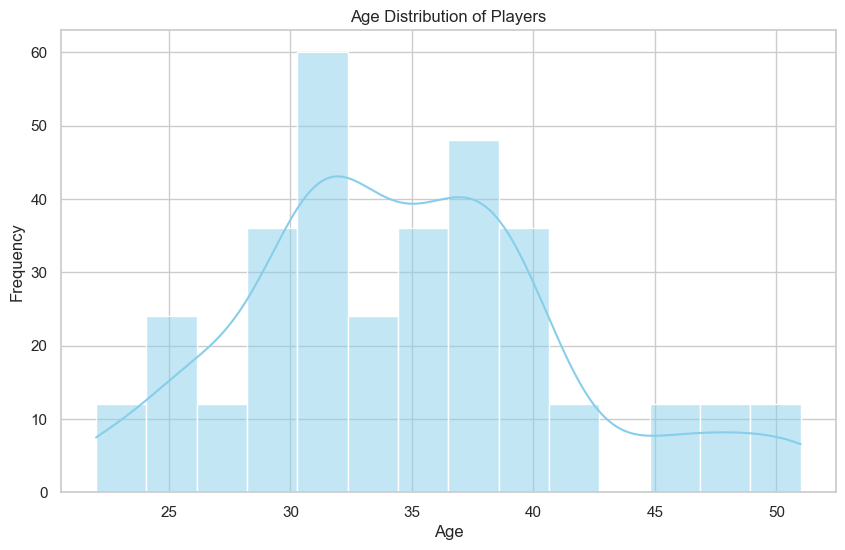

C:\Users\Neethiarasu\AppData\Local\Temp\ipykernel_10684\4004217451.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dominance', data=player_stats_filtered, palette='Set2')


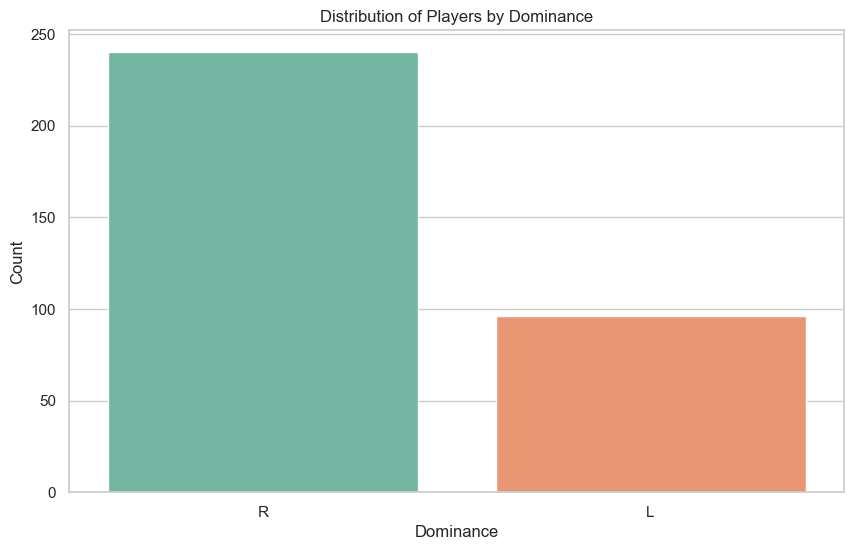

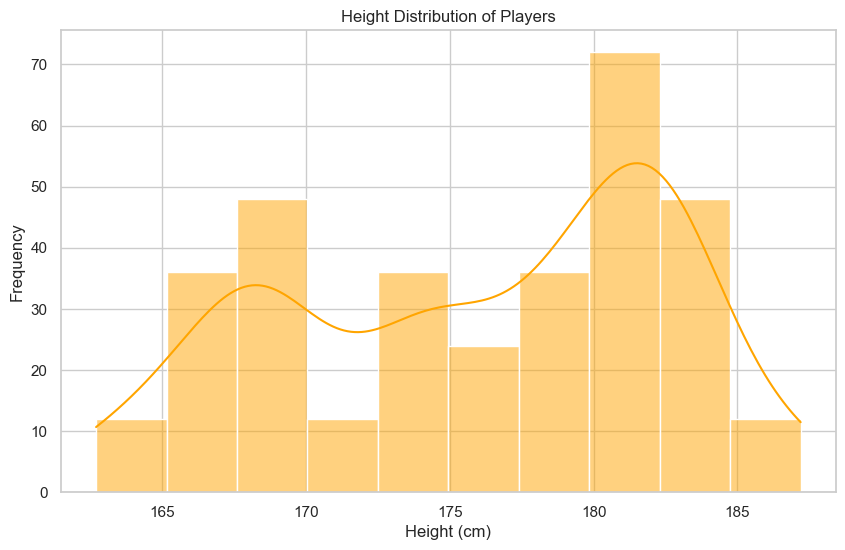

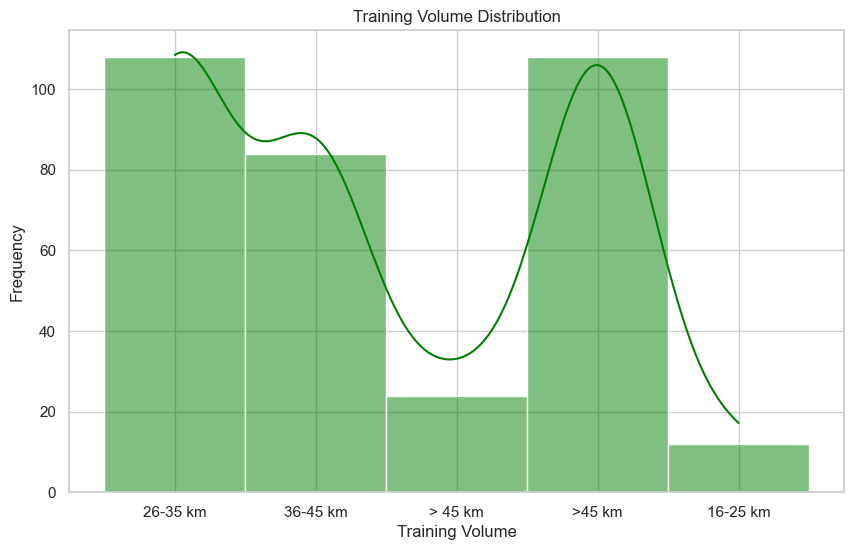

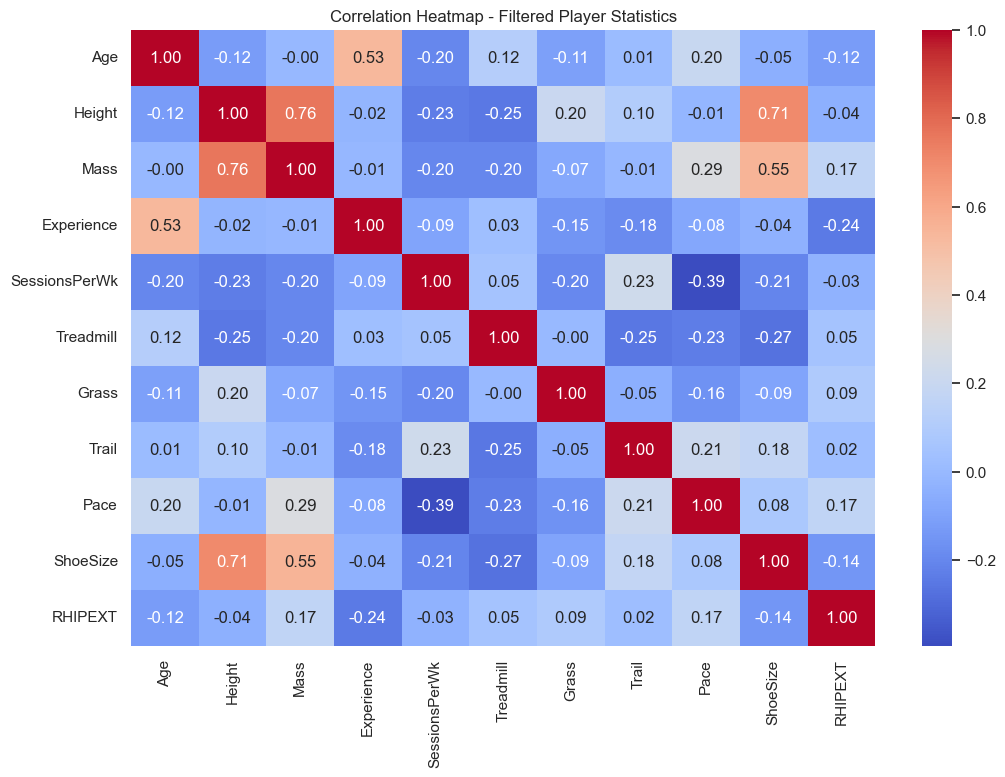

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual aesthetics for seaborn
sns.set(style="whitegrid")

# Define file paths
file_paths = {
    'player_stats': 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/raw/player_statistics.csv',
    'match_events': 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/raw/match_events.csv',
    'positional_data': 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/raw/positional_data.csv',
    'biomechanical_data': 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/raw/biomechanical_data.csv'
}

# Load datasets with a function
def load_dataset(filepath):
    try:
        data = pd.read_csv(filepath)
        print(f"Dataset loaded successfully from {filepath}")
        return data
    except FileNotFoundError as e:
        print(f"Error: {e}. Please check the file path and try again.")
        return None

# Load all datasets
player_stats = load_dataset(file_paths['player_stats'])
match_events = load_dataset(file_paths['match_events'])
positional_data = load_dataset(file_paths['positional_data'])
biomechanical_data = load_dataset(file_paths['biomechanical_data'])

# Combine datasets or check for the presence of essential features in each dataset
if all([player_stats is not None, match_events is not None, positional_data is not None, biomechanical_data is not None]):
    
    # List of the top 20 features for injury prediction
    essential_features = [
        'Age', 'Height', 'Mass', 'Gender', 'Dominance', 
        'Experience', 'SessionsPerWk', 'Treadmill', 'Grass', 
        'Trail', 'Volume', 'Pace', 'RaceDist', 'InjuryLoc', 
        'DiagnosticMed', 'ShoeSize', 'RFSI25', 'LFSI25', 
        'RHIPEXT', 'Recent Injury'
    ]
    
    # Create a dictionary to hold filtered data
    filtered_data = {}

    # Check each dataset for the required features
    for feature in essential_features:
        if feature in player_stats.columns:
            filtered_data[feature] = player_stats[feature]
        elif feature in match_events.columns:
            filtered_data[feature] = match_events[feature]
        elif feature in positional_data.columns:
            filtered_data[feature] = positional_data[feature]
        elif feature in biomechanical_data.columns:
            filtered_data[feature] = biomechanical_data[feature]
        else:
            print(f"Feature {feature} not found in any dataset.")
    
    # Convert filtered_data dictionary to a DataFrame
    player_stats_filtered = pd.DataFrame(filtered_data)

    # Overview of the filtered player statistics dataset
    print("### Filtered Player Statistics Overview")
    display(player_stats_filtered.head())

    # Basic statistics of the filtered data
    print("### Filtered Player Statistics Description")
    display(player_stats_filtered.describe())

    # Check for missing values in the filtered data
    def check_missing_values(df, df_name):
        missing_values = df.isnull().sum()
        print(f"### Missing Values in {df_name}")
        display(missing_values[missing_values > 0])
        return missing_values

    missing_values_stats = check_missing_values(player_stats_filtered, 'Filtered Player Statistics')

    # Handle missing values
    player_stats_filtered.fillna(method='ffill', inplace=True)  # Forward fill

    # Verify missing values have been handled
    print("### Missing Values After Handling (Filtered Player Statistics)")
    check_missing_values(player_stats_filtered, 'Filtered Player Statistics (Post-Handling)')

    # Data visualization based on filtered features
    plt.figure(figsize=(10, 6))
    sns.histplot(player_stats_filtered['Age'], kde=True, color='skyblue')
    plt.title('Age Distribution of Players')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Dominance', data=player_stats_filtered, palette='Set2')
    plt.title('Distribution of Players by Dominance')
    plt.xlabel('Dominance')
    plt.ylabel('Count')
    plt.show()

    # Additional Visualizations
    # Distribution of Player Heights
    plt.figure(figsize=(10, 6))
    sns.histplot(player_stats_filtered['Height'], kde=True, color='orange')
    plt.title('Height Distribution of Players')
    plt.xlabel('Height (cm)')
    plt.ylabel('Frequency')
    plt.show()

    # Training Volume Distribution
    if 'Volume' in player_stats_filtered.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(player_stats_filtered['Volume'], kde=True, color='green')
        plt.title('Training Volume Distribution')
        plt.xlabel('Training Volume')
        plt.ylabel('Frequency')
        plt.show()
    
    # Correlation heatmap - exclude non-numeric columns
    numeric_columns = player_stats_filtered.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(player_stats_filtered[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap - Filtered Player Statistics')
    plt.show()

else:
    print("One or more datasets could not be loaded. Please fix the file paths and try again.")
